In [1]:
from IPython.display import HTML
HTML('''
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
''')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.api as sm

In [2]:
%matplotlib inline

In [2]:
path = '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/NRD/'

In [4]:
admissions = pd.read_csv(path+'cohorts/ami/comorbidities.csv')

In [5]:
admissions.columns

Index(['CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS',
       'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX',
       'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES',
       'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH',
       'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE',
       'CM_WGHTLOSS', 'KEY_NRD', 'AGE', 'FEMALE', 'HOSP_NRD', 'NRD_VisitLink',
       'NRD_DaysToEvent', 'readm30'],
      dtype='object')

In [6]:
comorb = [n for n in admissions.columns if n.startswith('CM')]

In [7]:
admissions = admissions.sort_values(['NRD_VisitLink', 'NRD_DaysToEvent'])

Pick only the first admission of each patient, i.e., one patient only contribute one sample:

In [8]:
patients_first = admissions.groupby('NRD_VisitLink', as_index=False).first()

In [9]:
patients_first['readm30'].value_counts()

False    170265
True      25430
Name: readm30, dtype: int64

In [10]:
patients_first.to_csv(path+'cohorts/ami/patients_first.csv', index=False)

## Result visualization

In [20]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import utils

In [33]:
from importlib import reload
reload(utils)
from utils import plot_roc

In [4]:
pred_test = pd.read_csv(path+'cohorts/ami/prediction_MELR.csv')

{0: 0.66664743744634092}

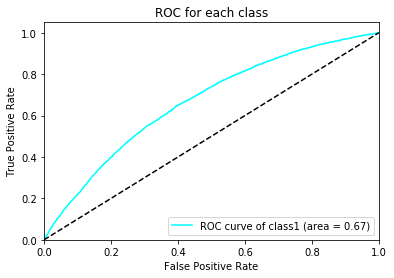

In [34]:
plot_roc(pred_test['y_pred'].values, pred_test['y_true'].values)